Loaded 200 images and 200 masks from D:/1/Mohsin/ACDC/database/training.
Loaded 100 images and 100 masks from D:/1/Mohsin/ACDC/database/testing.


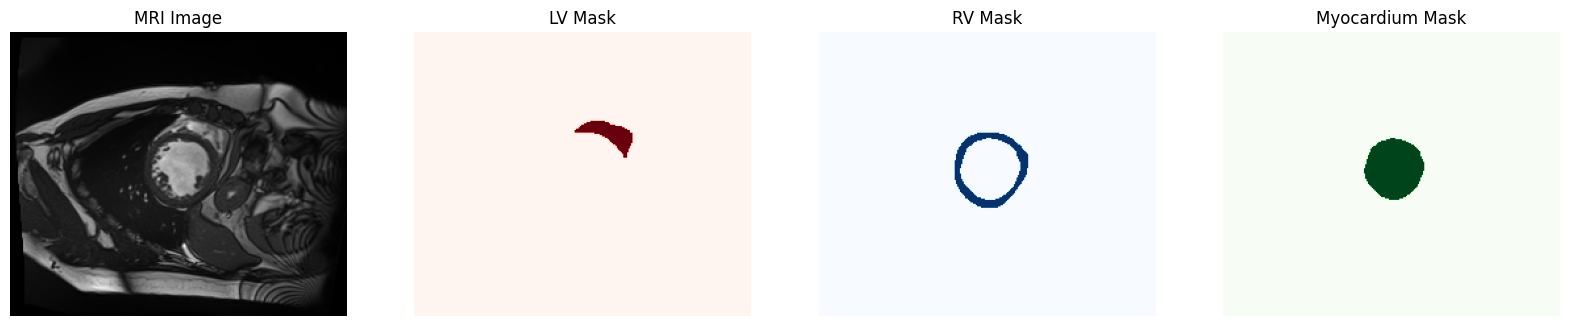

In [5]:
import os
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset, DataLoader
import torch
import torch.nn as nn
from torchvision import transforms as T

# Step 1: Load ACDC Data with Multi-Class Support
def load_acdc_data(data_path):
    """
    Load images and masks from the ACDC dataset.
    Args:
        data_path (str): Path to the dataset directory (training or testing).
    Returns:
        tuple: Two lists containing paths to images and masks.
    """
    images, masks = [], []

    for patient_folder in os.listdir(data_path):
        patient_path = os.path.join(data_path, patient_folder)
        if os.path.isdir(patient_path):
            for file in os.listdir(patient_path):
                if file.endswith('_gt.nii.gz'):  # Mask files
                    masks.append(os.path.join(patient_path, file))
                elif '_frame' in file and not file.endswith('_gt.nii.gz'):  # Image files
                    images.append(os.path.join(patient_path, file))

    images.sort()
    masks.sort()

    if len(images) != len(masks):
        raise ValueError(f"Mismatch in counts: {len(images)} images and {len(masks)} masks.")

    print(f"Loaded {len(images)} images and {len(masks)} masks from {data_path}.")
    return images, masks

# Paths
train_data_path = "D:/1/Mohsin/ACDC/database/training"
test_data_path = "D:/1/Mohsin/ACDC/database/testing"

# Load data
train_images, train_masks = load_acdc_data(train_data_path)
test_images, test_masks = load_acdc_data(test_data_path)

# Step 2: Visualize LV, RV, and Myocardium

def visualize_sample(image_path, mask_path):
    """
    Visualize the middle slice of an image and its multi-class mask (LV, RV, Myocardium).
    """
    image_nii = nib.load(image_path)
    mask_nii = nib.load(mask_path)

    image_data = image_nii.get_fdata()
    mask_data = mask_nii.get_fdata()

    middle_slice = image_data.shape[2] // 2

    # Extract classes from the mask
    lv_mask = (mask_data[:, :, middle_slice] == 1).astype(float)
    rv_mask = (mask_data[:, :, middle_slice] == 2).astype(float)
    myo_mask = (mask_data[:, :, middle_slice] == 3).astype(float)

    plt.figure(figsize=(20, 5))
    
    # MRI Image
    plt.subplot(1, 4, 1)
    plt.imshow(image_data[:, :, middle_slice], cmap="gray")
    plt.title("MRI Image")
    plt.axis("off")

    # LV Mask
    plt.subplot(1, 4, 2)
    plt.imshow(lv_mask, cmap="Reds")
    plt.title("LV Mask")
    plt.axis("off")

    # RV Mask
    plt.subplot(1, 4, 3)
    plt.imshow(rv_mask, cmap="Blues")
    plt.title("RV Mask")
    plt.axis("off")

    # Myocardium Mask
    plt.subplot(1, 4, 4)
    plt.imshow(myo_mask, cmap="Greens")
    plt.title("Myocardium Mask")
    plt.axis("off")

    plt.show()

# Visualize a training sample
visualize_sample(train_images[0], train_masks[0])


Loaded 200 images and 200 masks from D:/1/Mohsin/ACDC/database/training.
Loaded 100 images and 100 masks from D:/1/Mohsin/ACDC/database/testing.


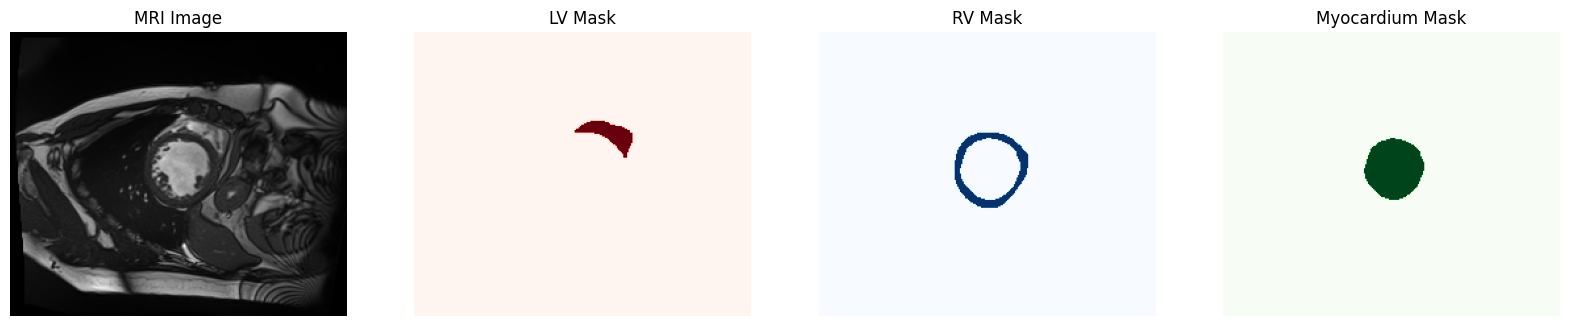

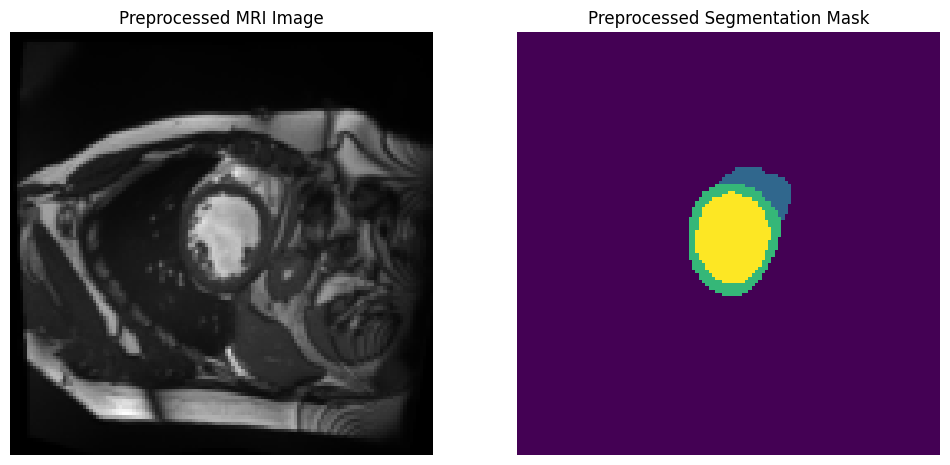

In [6]:
import os
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset, DataLoader
import torch
import torch.nn as nn
from torchvision import transforms as T

# Step 1: Load ACDC Data with Multi-Class Support
def load_acdc_data(data_path):
    """
    Load images and masks from the ACDC dataset.
    Args:
        data_path (str): Path to the dataset directory (training or testing).
    Returns:
        tuple: Two lists containing paths to images and masks.
    """
    images, masks = [], []

    for patient_folder in os.listdir(data_path):
        patient_path = os.path.join(data_path, patient_folder)
        if os.path.isdir(patient_path):
            for file in os.listdir(patient_path):
                if file.endswith('_gt.nii.gz'):  # Mask files
                    masks.append(os.path.join(patient_path, file))
                elif '_frame' in file and not file.endswith('_gt.nii.gz'):  # Image files
                    images.append(os.path.join(patient_path, file))

    images.sort()
    masks.sort()

    if len(images) != len(masks):
        raise ValueError(f"Mismatch in counts: {len(images)} images and {len(masks)} masks.")

    print(f"Loaded {len(images)} images and {len(masks)} masks from {data_path}.")
    return images, masks

# Paths
train_data_path = "D:/1/Mohsin/ACDC/database/training"
test_data_path = "D:/1/Mohsin/ACDC/database/testing"

# Load data
train_images, train_masks = load_acdc_data(train_data_path)
test_images, test_masks = load_acdc_data(test_data_path)

# Step 2: Visualize LV, RV, and Myocardium

def visualize_sample(image_path, mask_path):
    """
    Visualize the middle slice of an image and its multi-class mask (LV, RV, Myocardium).
    """
    image_nii = nib.load(image_path)
    mask_nii = nib.load(mask_path)

    image_data = image_nii.get_fdata()
    mask_data = mask_nii.get_fdata()

    middle_slice = image_data.shape[2] // 2

    # Extract classes from the mask
    lv_mask = (mask_data[:, :, middle_slice] == 1).astype(float)
    rv_mask = (mask_data[:, :, middle_slice] == 2).astype(float)
    myo_mask = (mask_data[:, :, middle_slice] == 3).astype(float)

    plt.figure(figsize=(20, 5))
    
    # MRI Image
    plt.subplot(1, 4, 1)
    plt.imshow(image_data[:, :, middle_slice], cmap="gray")
    plt.title("MRI Image")
    plt.axis("off")

    # LV Mask
    plt.subplot(1, 4, 2)
    plt.imshow(lv_mask, cmap="Reds")
    plt.title("LV Mask")
    plt.axis("off")

    # RV Mask
    plt.subplot(1, 4, 3)
    plt.imshow(rv_mask, cmap="Blues")
    plt.title("RV Mask")
    plt.axis("off")

    # Myocardium Mask
    plt.subplot(1, 4, 4)
    plt.imshow(myo_mask, cmap="Greens")
    plt.title("Myocardium Mask")
    plt.axis("off")

    plt.show()

# Visualize a training sample
visualize_sample(train_images[0], train_masks[0])

# Step 3: Data Preprocessing
def preprocess_data(image_path, mask_path, target_size=(128, 128)):
    """
    Preprocess the image and mask by resizing and normalizing.
    Args:
        image_path (str): Path to the MRI image.
        mask_path (str): Path to the segmentation mask.
        target_size (tuple): Target size for resizing (height, width).
    Returns:
        tuple: Preprocessed image and mask.
    """
    image_nii = nib.load(image_path)
    mask_nii = nib.load(mask_path)

    image_data = image_nii.get_fdata()
    mask_data = mask_nii.get_fdata()

    middle_slice = image_data.shape[2] // 2

    image_slice = image_data[:, :, middle_slice]
    mask_slice = mask_data[:, :, middle_slice]

    # Normalize image
    image_slice = (image_slice - np.min(image_slice)) / (np.max(image_slice) - np.min(image_slice))

    # Resize image and mask
    image_resized = T.functional.resize(torch.tensor(image_slice).unsqueeze(0), target_size)
    mask_resized = T.functional.resize(torch.tensor(mask_slice).unsqueeze(0), target_size, interpolation=T.InterpolationMode.NEAREST)

    return image_resized.squeeze(0).numpy(), mask_resized.squeeze(0).numpy()

# Preprocess a sample
preprocessed_image, preprocessed_mask = preprocess_data(train_images[0], train_masks[0])

# Step 4: Visualize Preprocessed Data
plt.figure(figsize=(12, 6))

# Preprocessed Image
plt.subplot(1, 2, 1)
plt.imshow(preprocessed_image, cmap="gray")
plt.title("Preprocessed MRI Image")
plt.axis("off")

# Preprocessed Mask
plt.subplot(1, 2, 2)
plt.imshow(preprocessed_mask, cmap="viridis")
plt.title("Preprocessed Segmentation Mask")
plt.axis("off")

plt.show()

Loaded 200 images and 200 masks from D:/1/Mohsin/ACDC/database/training.
Loaded 100 images and 100 masks from D:/1/Mohsin/ACDC/database/testing.


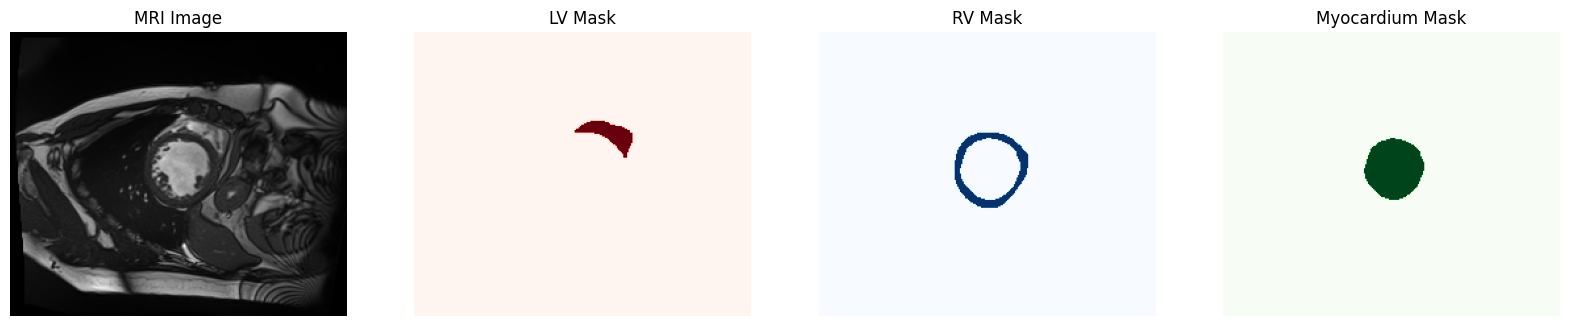

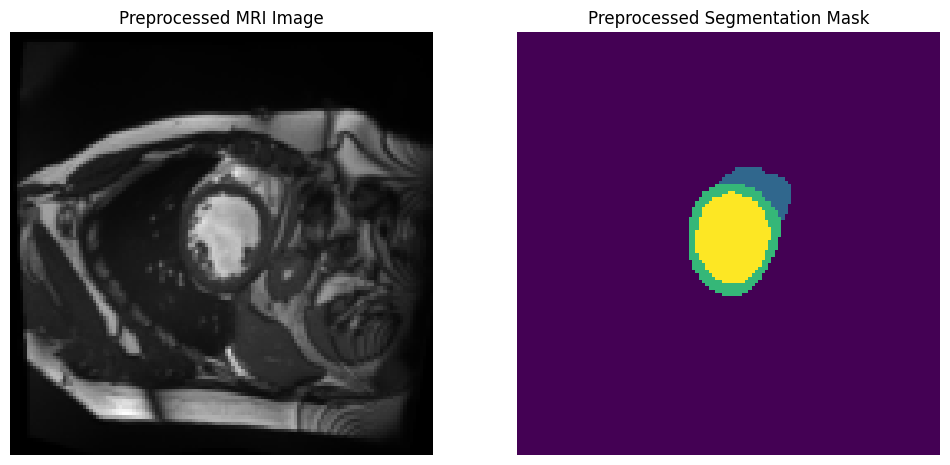

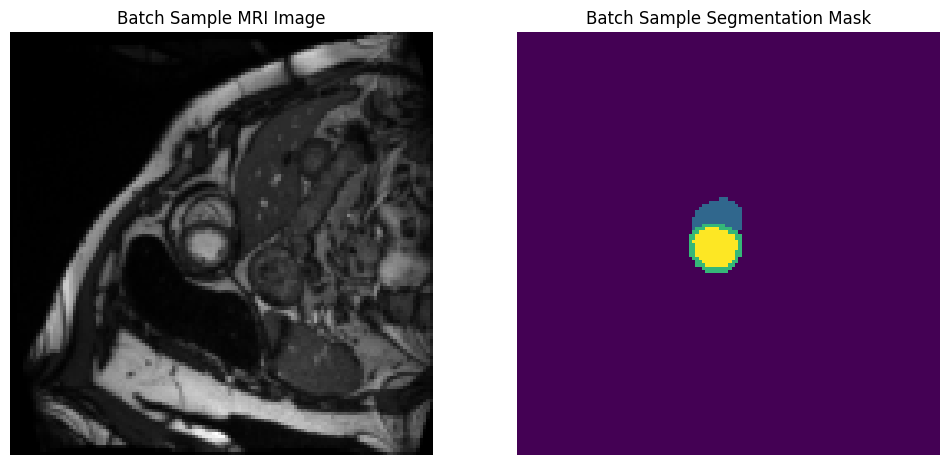

In [7]:
import os
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset, DataLoader
import torch
import torch.nn as nn
from torchvision import transforms as T

# Step 1: Load ACDC Data with Multi-Class Support
def load_acdc_data(data_path):
    """
    Load images and masks from the ACDC dataset.
    Args:
        data_path (str): Path to the dataset directory (training or testing).
    Returns:
        tuple: Two lists containing paths to images and masks.
    """
    images, masks = [], []

    for patient_folder in os.listdir(data_path):
        patient_path = os.path.join(data_path, patient_folder)
        if os.path.isdir(patient_path):
            for file in os.listdir(patient_path):
                if file.endswith('_gt.nii.gz'):  # Mask files
                    masks.append(os.path.join(patient_path, file))
                elif '_frame' in file and not file.endswith('_gt.nii.gz'):  # Image files
                    images.append(os.path.join(patient_path, file))

    images.sort()
    masks.sort()

    if len(images) != len(masks):
        raise ValueError(f"Mismatch in counts: {len(images)} images and {len(masks)} masks.")

    print(f"Loaded {len(images)} images and {len(masks)} masks from {data_path}.")
    return images, masks

# Paths
train_data_path = "D:/1/Mohsin/ACDC/database/training"
test_data_path = "D:/1/Mohsin/ACDC/database/testing"

# Load data
train_images, train_masks = load_acdc_data(train_data_path)
test_images, test_masks = load_acdc_data(test_data_path)

# Step 2: Visualize LV, RV, and Myocardium

def visualize_sample(image_path, mask_path):
    """
    Visualize the middle slice of an image and its multi-class mask (LV, RV, Myocardium).
    """
    image_nii = nib.load(image_path)
    mask_nii = nib.load(mask_path)

    image_data = image_nii.get_fdata()
    mask_data = mask_nii.get_fdata()

    middle_slice = image_data.shape[2] // 2

    # Extract classes from the mask
    lv_mask = (mask_data[:, :, middle_slice] == 1).astype(float)
    rv_mask = (mask_data[:, :, middle_slice] == 2).astype(float)
    myo_mask = (mask_data[:, :, middle_slice] == 3).astype(float)

    plt.figure(figsize=(20, 5))
    
    # MRI Image
    plt.subplot(1, 4, 1)
    plt.imshow(image_data[:, :, middle_slice], cmap="gray")
    plt.title("MRI Image")
    plt.axis("off")

    # LV Mask
    plt.subplot(1, 4, 2)
    plt.imshow(lv_mask, cmap="Reds")
    plt.title("LV Mask")
    plt.axis("off")

    # RV Mask
    plt.subplot(1, 4, 3)
    plt.imshow(rv_mask, cmap="Blues")
    plt.title("RV Mask")
    plt.axis("off")

    # Myocardium Mask
    plt.subplot(1, 4, 4)
    plt.imshow(myo_mask, cmap="Greens")
    plt.title("Myocardium Mask")
    plt.axis("off")

    plt.show()

# Visualize a training sample
visualize_sample(train_images[0], train_masks[0])

# Step 3: Data Preprocessing
def preprocess_data(image_path, mask_path, target_size=(128, 128)):
    """
    Preprocess the image and mask by resizing and normalizing.
    Args:
        image_path (str): Path to the MRI image.
        mask_path (str): Path to the segmentation mask.
        target_size (tuple): Target size for resizing (height, width).
    Returns:
        tuple: Preprocessed image and mask.
    """
    image_nii = nib.load(image_path)
    mask_nii = nib.load(mask_path)

    image_data = image_nii.get_fdata()
    mask_data = mask_nii.get_fdata()

    middle_slice = image_data.shape[2] // 2

    image_slice = image_data[:, :, middle_slice]
    mask_slice = mask_data[:, :, middle_slice]

    # Normalize image
    image_slice = (image_slice - np.min(image_slice)) / (np.max(image_slice) - np.min(image_slice))

    # Resize image and mask
    image_resized = T.functional.resize(torch.tensor(image_slice).unsqueeze(0), target_size)
    mask_resized = T.functional.resize(torch.tensor(mask_slice).unsqueeze(0), target_size, interpolation=T.InterpolationMode.NEAREST)

    return image_resized.squeeze(0).numpy(), mask_resized.squeeze(0).numpy()

# Preprocess a sample
preprocessed_image, preprocessed_mask = preprocess_data(train_images[0], train_masks[0])

# Step 4: Visualize Preprocessed Data
plt.figure(figsize=(12, 6))

# Preprocessed Image
plt.subplot(1, 2, 1)
plt.imshow(preprocessed_image, cmap="gray")
plt.title("Preprocessed MRI Image")
plt.axis("off")

# Preprocessed Mask
plt.subplot(1, 2, 2)
plt.imshow(preprocessed_mask, cmap="viridis")
plt.title("Preprocessed Segmentation Mask")
plt.axis("off")

plt.show()

# Step 5: Dataset and DataLoader Classes
class CardiacDataset(Dataset):
    def __init__(self, image_paths, mask_paths, target_size=(128, 128)):
        self.image_paths = image_paths
        self.mask_paths = mask_paths
        self.target_size = target_size

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image_path = self.image_paths[idx]
        mask_path = self.mask_paths[idx]
        
        image, mask = preprocess_data(image_path, mask_path, self.target_size)

        # Convert to tensors
        image_tensor = torch.tensor(image, dtype=torch.float32).unsqueeze(0)  # Add channel dimension
        mask_tensor = torch.tensor(mask, dtype=torch.long)  # Masks as class indices

        return image_tensor, mask_tensor

# Create Dataset and DataLoader
train_dataset = CardiacDataset(train_images, train_masks)
test_dataset = CardiacDataset(test_images, test_masks)

train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False)

# Step 6: Visualize DataLoader Output
sample_image, sample_mask = next(iter(train_loader))

# Visualize one batch of data
plt.figure(figsize=(12, 6))

# First image in the batch
plt.subplot(1, 2, 1)
plt.imshow(sample_image[0, 0], cmap="gray")  # First channel of the first image
plt.title("Batch Sample MRI Image")
plt.axis("off")

# Corresponding mask
plt.subplot(1, 2, 2)
plt.imshow(sample_mask[0], cmap="viridis")
plt.title("Batch Sample Segmentation Mask")
plt.axis("off")

plt.show()
